In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
import datetime

import factors_util as fac_util

In [9]:
spy_data = fac_util.download_from_yf("SPY", "2015-01-01", "2025-01-01")
factors_data = fac_util.load_ff_factors("F-F_Research_Data_5_Factors_2x3.CSV")

[*********************100%***********************]  1 of 1 completed


In [28]:
factors_data = fac_util.load_ff_factors("F-F_Research_Data_Factors.CSV")

In [10]:
spy_data.head()

,Portfolio
Date,
2015-02,0.056204
2015-03,-0.020079
2015-04,0.014341
2015-05,0.012856
2015-06,-0.025054


In [29]:
factors_data.head()

,Mkt-RF,SMB,HML,RF
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031


In [30]:
model, data, cumulative = fac_util.factor_model_statsmodel(
    spy_data,
    factors_data
)
print(model.summary())
cumulative.head()

                            OLS Regression Results                            
Dep. Variable:       Excess_Portfolio   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3474.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           2.02e-90
Time:                        15:55:15   Log-Likelihood:                 370.89
No. Observations:                  91   AIC:                            -733.8
Df Residuals:                      87   BIC:                            -723.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.508e-05      0.000      0.211      0.8

,Excess_Portfolio,replicating,alpha
2015-02,1.056204,1.059891,0.996314
2015-03,1.034996,1.041678,0.993428
2015-04,1.049840,1.054623,0.995330
2015-05,1.063337,1.066890,0.996549
2015-06,1.036695,1.044341,0.992643


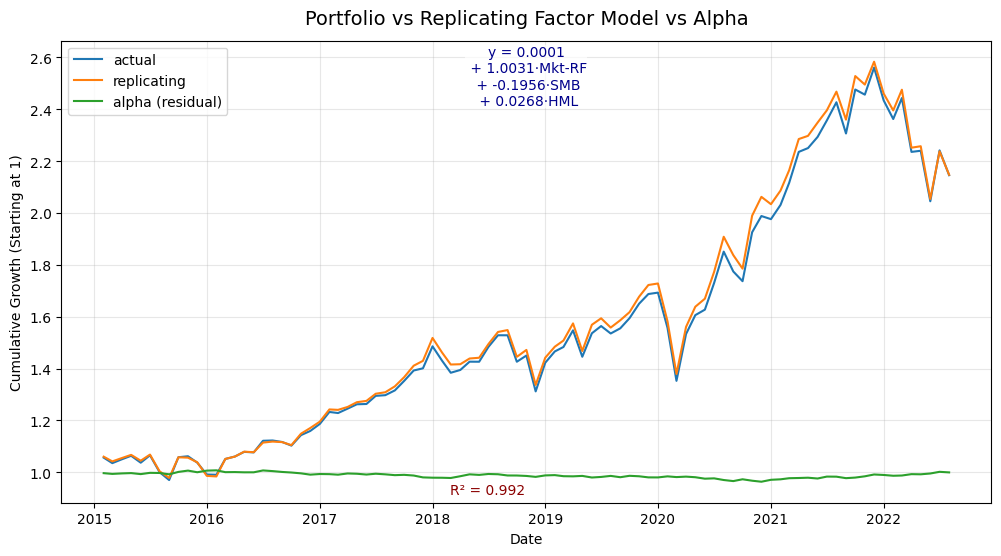

In [31]:
fac_util.plot_model_statsmodel(cumulative, model=model)

## Using Lasso in scikit-learn

0.9917172080940981
y = 0.0094
 + 0.0461·Mkt-RF
 - 0.0051·SMB
 + 0.0010·HML
         Excess_Portfolio  Replicating_Lasso  Alpha_Lasso
2015-02          1.056204           1.059856     0.996349
2015-03          1.034996           1.041755     0.993358
2015-04          1.049840           1.054604     0.995352
2015-05          1.063337           1.066902     0.996542
2015-06          1.036695           1.044473     0.992524


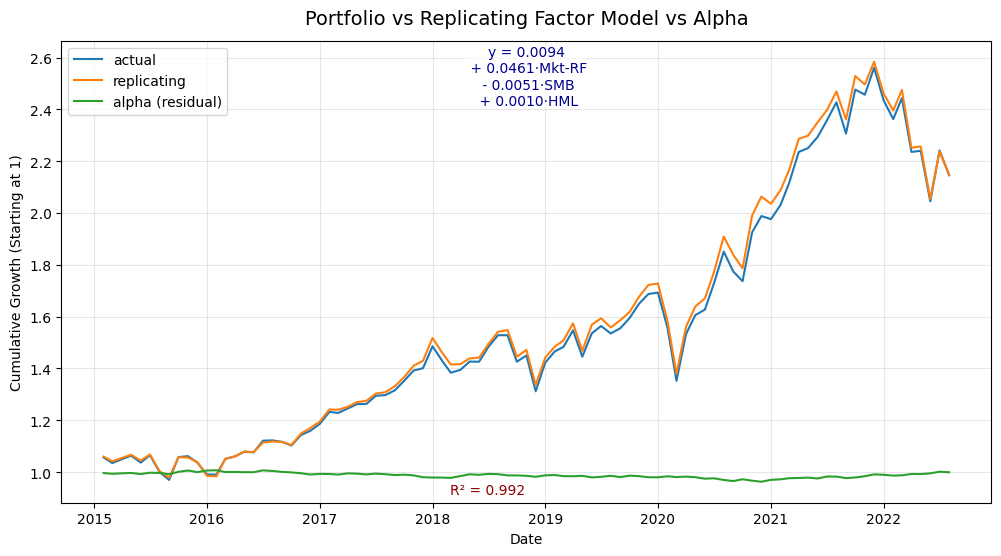

In [32]:
lasso, coefs, rsq, data, cumulative = fac_util.factor_model_lasso(
    spy_data,
    factors_data
)
print(rsq)
print(fac_util.get_formula_lasso(lasso, coefs))
print(cumulative.head())
fac_util.plot_model_lasso(cumulative, lasso, coefs, rsq)